#PDF Reading

In [ ]:
pip install pyPDF2

In [ ]:
import PyPDF2
import pdf_reader as pdfr2

In [ ]:
Number_Train_files= int(input("number of files: "))

file_list=[]
x=''

for i in range(Number_Train_files):
  file_list.append(input("\nEnter Train File name, with file type extension: "))

pages,All_docs=pdfr2.pdfreader(Number_Train_files,file_list,PyPDF2)
# All_Docs[i][j] is j-th page of i-th file

number of files: 2

Enter Train File name, with file type extension: Apr-17.PDF

Enter Train File name, with file type extension: Apr-18.PDF


#Silhouette Score

In [ ]:
import nltk
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_score
import pandas as pd
from nltk.tokenize import RegexpTokenizer
#from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
from nltk.corpus import stopwords
import gensim
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
from nltk import sent_tokenize
Dup_All_Docs=All_docs[:]

In [ ]:
nltk.download('stopwords')
nltk.download("punkt")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import silhoutte_score as silscore

In [ ]:
tokens=silscore.tokens(All_docs,RegexpTokenizer,stopwords,sent_tokenize)#a list of tokens for input files

In [ ]:
n= silscore.clusters(TfidfVectorizer,tokens,KMeans,silhouette_score)

In [ ]:
print("Optimal numbers of clusters are : {}".format(n))

Optimal numbers of clusters are : 10


#LDA LSI HDP

In [ ]:
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer
from gensim.corpora import Dictionary
from gensim.models import TfidfModel,LdaModel, LsiModel, HdpModel,LdaMulticore,CoherenceModel
from gensim.models.wrappers import LdaMallet
import matplotlib.pyplot as plt

In [ ]:
import lda_lsi_hdp4 as llh

In [ ]:
dictionary,corpus=llh.diction(tokens,TfidfModel,Dictionary)

In [ ]:
lda,lsi,hdp= llh.model_build(LdaMulticore,LsiModel,HdpModel,corpus,dictionary,num_topics=n)

In [ ]:
lda_df,lsi_df,hdp_df=llh.word_df(lda,lsi,hdp,50,np,pd)

#Model evaluations

In [ ]:
model1 = gensim.models.Word2Vec(tokens, min_count = 1,size = 100, window = 5) #creating word model for finding cluster proximity


In [ ]:
import model_evaluation as melv
import statistics 
from scipy import stats
from statistics import stdev

In [ ]:
#lda_words_to_remove[i] is list of words to remove from topic-i
#lda_words[i] is list of all words in topic-i
#number_words_removed_lda is no. of words removed from all topics of LDA

alpha=0.01   # Statistical significance
null_hyp=0.5 # Ho: Average Score<=null_hyp

#LDA
lda_words_to_remove,lda_words,number_words_removed_lda= melv.statistical_signficance(statistics,stats,stdev,lda_df,alpha,null_hyp,model1,np,pd)

#LSI
lsi_words_to_remove,lsi_words,number_words_removed_lsi=melv.statistical_signficance(statistics,stats,stdev,lsi_df,alpha,null_hyp,model1,np,pd)

#HDP
hdp_words_to_remove,hdp_words,number_words_removed_hdp=melv.statistical_signficance(statistics,stats,stdev,hdp_df,alpha,null_hyp,model1,np,pd)

words_removed=[number_words_removed_lsi, number_words_removed_hdp, number_words_removed_lda]

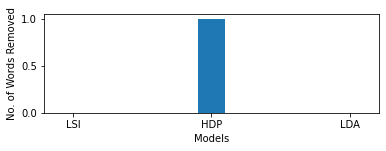

In [ ]:
def evaluate_bar_graph(coherences, indices):
    plt.subplot(2,1,1)
    assert len(coherences) == len(indices)
    n = len(coherences)
    x = np.arange(n)
    plt.bar(x, coherences, width=0.2, tick_label=indices, align='center')
    plt.xlabel('Models')
    plt.ylabel('No. of Words Removed')  


evaluate_bar_graph([number_words_removed_lsi, number_words_removed_hdp, number_words_removed_lda],
                   ['LSI', 'HDP', 'LDA'])


In [ ]:
Number_Train_files= int(input("number of prediction files: "))

pred_file_list=[]
x=''

for i in range(Number_Train_files):
  pred_file_list.append(input("\nEnter Train File name, with file type extension: "))

pages,new_docs=pdfr2.pdfreader(Number_Train_files,pred_file_list,PyPDF2)
# All_Docs[i][j] is j-th page of i-th file
new_tokens=silscore.tokens(new_docs,RegexpTokenizer,stopwords,sent_tokenize)

ideal_model=melv.best_model(number_words_removed_lsi, number_words_removed_hdp, number_words_removed_lda,lda,lsi,hdp)



number of prediction files: 1

Enter Train File name, with file type extension: Apr-20.PDF


In [ ]:
New_Topic_id,New_Topic_Prob=melv.new_topic(ideal_model,dictionary,new_tokens)

Ideal Model is : LdaModel(num_terms=2065, num_topics=10, decay=0.5, chunksize=2000)





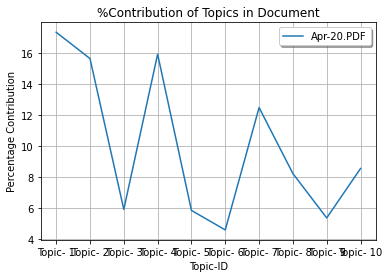

In [ ]:
print("Ideal Model is :",ideal_model)
print("\n\n")
plt.xlabel("Topic-ID")
plt.ylabel("Percentage Contribution")
plt.title("%Contribution of Topics in Document")
for i in range(Number_Prediction_files):
  plt.plot(New_Topic_id,New_Topic_Prob,label=Prediction_files[i])

plt.legend(loc='best',shadow=True)
plt.grid()

In [ ]:
pip install wordcloud wikipedia

In [ ]:
import wikipedia
import random
import automatic_topic_labelling1 as atl

In [ ]:
idealtopics = [[word for word, prob in topic] for topicid, topic in ideal_model.show_topics(num_words=50,formatted=False)]


In [ ]:
automatic_labels_topic=atl.automatic_labels(idealtopics,wikipedia,RegexpTokenizer,model1,stopwords,1)

#Word CLoud

In [ ]:
pip install wordcloud wikipedia



Topic- 1   Pricing strategies


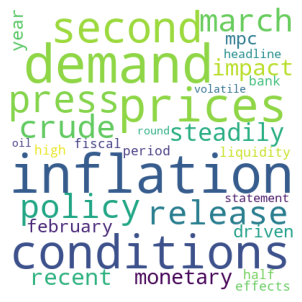



Topic- 2   Fiscal policy


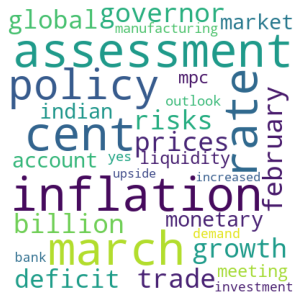



Topic- 3   Pricing strategies


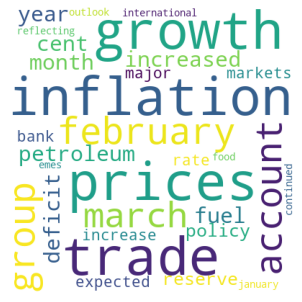



Topic- 4   Fiscal policy


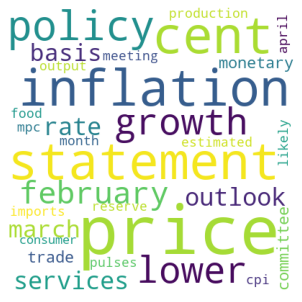



Topic- 5   Bench press


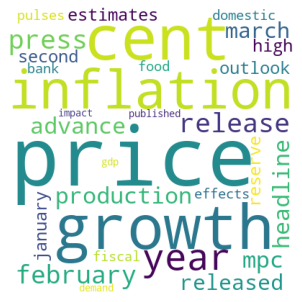



Topic- 6   Investment goods


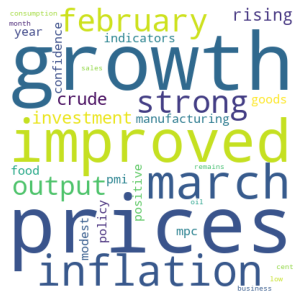



Topic- 7   International Monetary Fund


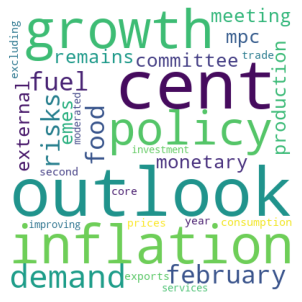



Topic- 8   Pricing strategies


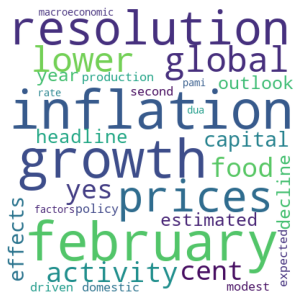



Topic- 9   Pricing strategies


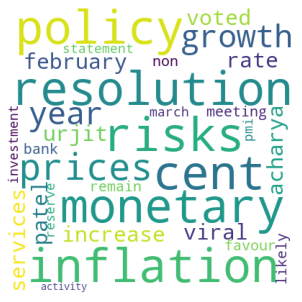



Topic- 10   Mission statement


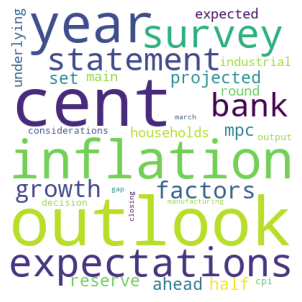

In [ ]:
import wordcloud
from wordcloud import WordCloud

x= automatic_labels_topic
for i in range(len(idealtopics)):
  print("\n\nTopic-",i+1," ", x[i])
  wordcloud = WordCloud(width = 400, height = 400, 
                background_color ='white', 
                stopwords = STOPWORDS,
                min_font_size = 10,
                max_words=30                
                ).generate(" ".join(idealtopics[i])) 
  
  plt.figure(figsize = (4, 6), facecolor = None,edgecolor='black') 
  y=plt.imshow(wordcloud) 
  plt.axis("off") 
  plt.tight_layout(pad = 0) 
  plt.show( )
  x.append(y)